In [1]:
# Install required libraries
!pip install PyMuPDF pytesseract SpeechRecognition gTTS pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.0
    Uninstalling click-8.3.0:
      Successfully uninstalled click-8.3.0


In [2]:
import fitz              # For PDF reading
import pytesseract       # For image text extraction
from PIL import Image
import io
import speech_recognition as sr
from google.colab import files
from pydub import AudioSegment

# --- 1️⃣ Text Input ---
def get_text_input():
    text = input("Enter your text paragraph:\n")
    return text

# --- 2️⃣ PDF Upload ---
def get_pdf_text():
    print("📄 Upload your PDF file...")
    uploaded = files.upload()
    for filename in uploaded.keys():
        pdf = fitz.open(filename)
        text = ""
        for page in pdf:
            text += page.get_text("text")
        return text

# --- 3️⃣ Image Upload ---
def get_image_text():
    print("🖼️ Upload your image containing text...")
    uploaded = files.upload()
    for filename in uploaded.keys():
        img = Image.open(io.BytesIO(uploaded[filename]))
        text = pytesseract.image_to_string(img)
        return text

# --- 4️⃣ Audio Upload (speech to text) ---
def get_audio_text():
    print("🎤 Upload your audio file (wav/mp3)...")
    uploaded = files.upload()
    recognizer = sr.Recognizer()
    for filename in uploaded.keys():
        # Convert mp3 to wav if needed
        if filename.endswith(".mp3"):
            sound = AudioSegment.from_mp3(filename)
            wav_filename = filename.replace(".mp3", ".wav")
            sound.export(wav_filename, format="wav")
            filename = wav_filename
        with sr.AudioFile(filename) as source:
            audio = recognizer.record(source)
            text = recognizer.recognize_google(audio, language="en-IN")
            return text

# --- 5️⃣ Choose Input Type ---
print("Select input type:")
print("1 - Text")
print("2 - PDF")
print("3 - Image")
print("4 - Audio")

choice = input("Enter choice (1/2/3/4): ")

if choice == "1":
    extracted_text = get_text_input()
elif choice == "2":
    extracted_text = get_pdf_text()
elif choice == "3":
    extracted_text = get_image_text()
elif choice == "4":
    extracted_text = get_audio_text()
else:
    extracted_text = "Invalid choice."


print("\n✅ Extracted Content:\n")
print(extracted_text)


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


Select input type:
1 - Text
2 - PDF
3 - Image
4 - Audio
Enter choice (1/2/3/4): 1
Enter your text paragraph:
In August 2018, the state of Kerala in India faced one of the worst floods in nearly a century. Unusually heavy rainfall caused rivers to overflow, leading to landslides and severe damage across several districts. More than 400 people lost their lives, and thousands were displaced as homes, roads, and bridges were destroyed. The Indian Army, Navy, and National Disaster Response Force (NDRF) carried out massive rescue operations, saving countless lives. The floods also united people across the nation, as volunteers and organizations came forward with donations, relief materials, and rehabilitation support for the affected communities.

✅ Extracted Content:

In August 2018, the state of Kerala in India faced one of the worst floods in nearly a century. Unusually heavy rainfall caused rivers to overflow, leading to landslides and severe damage across several districts. More than 40

# Text Preprocessing

# **Step 1: Text Cleaning**

Remove unwanted or noisy parts of the text.
Tasks:

Remove HTML tags

Remove URLs

Remove email id, mentions, hashtags

Remove extra spaces and line breaks

Convert text to lowercase (optional, depending on model)

In [3]:
import re

def clean_text(text):
    # 1️ Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 2️ Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3️ Remove email IDs, mentions (@username), and hashtags (#topic)
    text = re.sub(r'\S*@\S*\s?', '', text)       # emails
    text = re.sub(r'@\w+', '', text)             # mentions
    text = re.sub(r'#\w+', '', text)             # hashtags

    # 4️ Remove numbers and special characters (optional)
    text = re.sub(r'[^A-Za-z0-9.,!?\'"()\s]', '', text)

    # 5️ Remove extra spaces and line breaks
    text = re.sub(r'\s+', ' ', text).strip()

    # 6️ Convert to lowercase (optional)
    text = text.lower()

    return text

# ✅ Apply cleaning after input extraction
cleaned_text = clean_text(extracted_text)

print("\n🧽 Cleaned Text:\n")
print(cleaned_text)



🧽 Cleaned Text:

in august 2018, the state of kerala in india faced one of the worst floods in nearly a century. unusually heavy rainfall caused rivers to overflow, leading to landslides and severe damage across several districts. more than 400 people lost their lives, and thousands were displaced as homes, roads, and bridges were destroyed. the indian army, navy, and national disaster response force (ndrf) carried out massive rescue operations, saving countless lives. the floods also united people across the nation, as volunteers and organizations came forward with donations, relief materials, and rehabilitation support for the affected communities.


# Tokenization

In [4]:
# Install spacy if not installed
!pip install spacy

In [5]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Apply tokenization
doc = nlp(cleaned_text)

# Extract tokens
word_tokens = [token.text for token in doc if not token.is_space]

# Display output
print("\n🔹 Total Tokens:", len(word_tokens))
print("\n🔹 First 30 Tokens:\n", word_tokens[:30])



🔹 Total Tokens: 114

🔹 First 30 Tokens:
 ['in', 'august', '2018', ',', 'the', 'state', 'of', 'kerala', 'in', 'india', 'faced', 'one', 'of', 'the', 'worst', 'floods', 'in', 'nearly', 'a', 'century', '.', 'unusually', 'heavy', 'rainfall', 'caused', 'rivers', 'to', 'overflow', ',', 'leading']


In [6]:
# Install wordcloud and matplotlib if not installed
!pip install wordcloud matplotlib

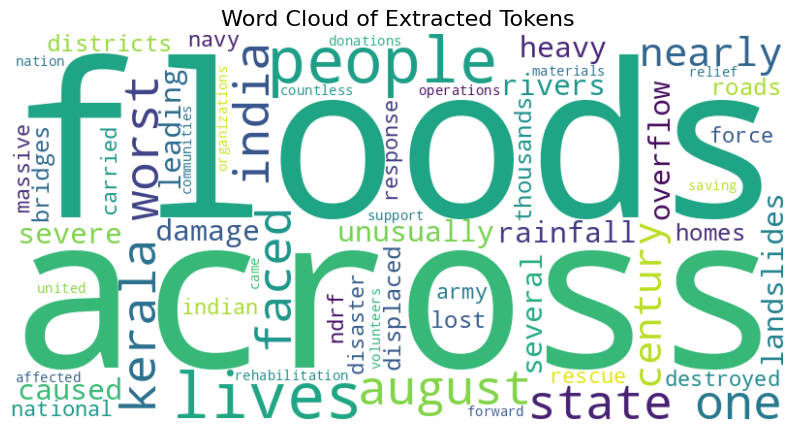

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all tokens into one string
text_for_cloud = " ".join(word_tokens)

# Create the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords=None
).generate(text_for_cloud)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Extracted Tokens", fontsize=16)
plt.show()


# Removal of stopwords, punctuations, spaces, and numbers

In [8]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Process the cleaned text
doc = nlp(cleaned_text)

# Remove stopwords, punctuations, spaces, and numbers
filtered_tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num
]

print("\n✅ Tokens after Stopword & Number Removal:")
print(filtered_tokens[:50])  # Show first 50 tokens
print("\n🔹 Total Tokens After Cleaning:", len(filtered_tokens))



✅ Tokens after Stopword & Number Removal:
['august', 'state', 'kerala', 'india', 'faced', 'worst', 'floods', 'nearly', 'century', 'unusually', 'heavy', 'rainfall', 'caused', 'rivers', 'overflow', 'leading', 'landslides', 'severe', 'damage', 'districts', 'people', 'lost', 'lives', 'thousands', 'displaced', 'homes', 'roads', 'bridges', 'destroyed', 'indian', 'army', 'navy', 'national', 'disaster', 'response', 'force', 'ndrf', 'carried', 'massive', 'rescue', 'operations', 'saving', 'countless', 'lives', 'floods', 'united', 'people', 'nation', 'volunteers', 'organizations']

🔹 Total Tokens After Cleaning: 59


# Lemmatization

In [9]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Process the cleaned text
doc = nlp(cleaned_text)

# Lemmatization (excluding stopwords, punctuation, spaces, and numbers)
lemmatized_tokens = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num
]

print("\n✅ Lemmatized Tokens:")
print(lemmatized_tokens[:50])  # Print first 50 tokens
print("\n🔹 Total Tokens After Lemmatization:", len(lemmatized_tokens))



✅ Lemmatized Tokens:
['august', 'state', 'kerala', 'india', 'face', 'bad', 'flood', 'nearly', 'century', 'unusually', 'heavy', 'rainfall', 'cause', 'river', 'overflow', 'lead', 'landslide', 'severe', 'damage', 'district', 'people', 'lose', 'life', 'thousand', 'displace', 'home', 'road', 'bridge', 'destroy', 'indian', 'army', 'navy', 'national', 'disaster', 'response', 'force', 'ndrf', 'carry', 'massive', 'rescue', 'operation', 'save', 'countless', 'life', 'flood', 'unite', 'people', 'nation', 'volunteer', 'organization']

🔹 Total Tokens After Lemmatization: 59


# Vectorization / Token Embedding

In [10]:
# ✅ Install the required library (only once)
!pip install transformers sentencepiece

In [11]:
import spacy
from transformers import PegasusTokenizer

# --- Step 1: Lemmatization ---
nlp = spacy.load("en_core_web_sm")

doc = nlp(cleaned_text)
lemmatized_tokens = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num
]

# Convert token list → text string
final_cleaned_text = " ".join(lemmatized_tokens)

print("\n✅ Lemmatized Text Preview:\n", final_cleaned_text[:300])
print("\n🔹 Total Tokens After Lemmatization:", len(lemmatized_tokens))


# --- Step 2: Vectorization / Token Embedding ---
model_name = "google/pegasus-xsum"
tokenizer = PegasusTokenizer.from_pretrained(model_name)

encoded_input = tokenizer(
    final_cleaned_text,           # 👈 use lemmatized text here
    return_tensors="pt",
    padding='longest',
    truncation=True,
    max_length=512
)

print("\n✅ Tokenization Complete!")
print(f"🔹 Input Text Length (chars): {len(final_cleaned_text)}")
print(f"🔹 Number of Tokens: {len(encoded_input['input_ids'][0])}")

print("\n🔹 First 20 Token IDs:\n", encoded_input['input_ids'][0][:20])

decoded_text = tokenizer.decode(encoded_input['input_ids'][0], skip_special_tokens=True)
print("\n🔹 Decoded Text Preview:\n", decoded_text[:300])



✅ Lemmatized Text Preview:
 august state kerala india face bad flood nearly century unusually heavy rainfall cause river overflow lead landslide severe damage district people lose life thousand displace home road bridge destroy indian army navy national disaster response force ndrf carry massive rescue operation save countless

🔹 Total Tokens After Lemmatization: 59


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]


✅ Tokenization Complete!
🔹 Input Text Length (chars): 434
🔹 Number of Tokens: 62

🔹 First 20 Token IDs:
 tensor([49447,   449, 79054, 10706,   749,  1025,  6172,  1517,  1902, 21220,
         1751, 14197,  1007,  2984, 17198,   756, 48162,  3726,  1303,  2607])

🔹 Decoded Text Preview:
 august state kerala india face bad flood nearly century unusually heavy rainfall cause river overflow lead landslide severe damage district people lose life thousand displace home road bridge destroy indian army navy national disaster response force ndrf carry massive rescue operation save countless


# Load the PEGASUS summarization model

In [12]:
# run this once
!pip install transformers sentencepiece -q

In [13]:
from transformers import PegasusForConditionalGeneration
import torch

model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")
model.eval()
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

PegasusForConditionalGeneration(
  (model): PegasusModel(
    (shared): Embedding(96103, 1024, padding_idx=0)
    (encoder): PegasusEncoder(
      (embed_tokens): Embedding(96103, 1024, padding_idx=0)
      (embed_positions): PegasusSinusoidalPositionalEmbedding(512, 1024)
      (layers): ModuleList(
        (0-15): 16 x PegasusEncoderLayer(
          (self_attn): PegasusAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): ReLU()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_nor

# “Abstractive Text Summarization using PEGASUS Model

In [14]:
# Use your lemmatized text
input_text = final_cleaned_text

# Tokenize
inputs = tokenizer(
    input_text,
    return_tensors="pt",
    padding="longest",
    truncation=True,
    max_length=512
).to(device)

# Generate summary
summary_ids = model.generate(
    inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    max_length=80,
    min_length=20,
    num_beams=4,
    length_penalty=2.0,
    early_stopping=True,
    no_repeat_ngram_size=3
)

# Decode and display
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("\n🧾 Summary:\n", summary)



🧾 Summary:
 People in flood-hit areas of the US state of arkansas are being urged to donate to the American Red Cross to help those affected by flooding.


In [15]:
# --- Run this once ---
!pip install bert-extractive-summarizer spacy transformers -q
!python -m spacy download en_core_web_sm

# --- Import and run ---
from summarizer import Summarizer

# Load pretrained BERT model
bert_model = Summarizer()

# Use your cleaned/preprocessed text variable
bert_summary = bert_model(final_cleaned_text, ratio=0.4)  # 40% of original text length
print("\n🧠 BERT Extractive Summary:\n", bert_summary)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]


🧠 BERT Extractive Summary:
 august state kerala india face bad flood nearly century unusually heavy rainfall cause river overflow lead landslide severe damage district people lose life thousand displace home road bridge destroy indian army navy national disaster response force ndrf carry massive rescue operation save countless life flood unite people nation volunteer organization come forward donation relief material rehabilitation support affected community


In [16]:
# --- Run this once ---
!pip install transformers sentencepiece -q

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

# Load FLAN-T5 model and tokenizer
model_name = "google/flan-t5-large"   # you can try 'base', 'xl', or 'xxl' too
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

# --- Use your cleaned/preprocessed text ---
input_text = final_cleaned_text

# Prepare input
inputs = tokenizer(
    "summarize: " + input_text,
    return_tensors="pt",
    truncation=True,
    padding="longest",
    max_length=1024
).to(device)

# Generate summary
summary_ids = model.generate(
    **inputs,
    max_length=200,      # adjust summary length
    min_length=50,
    num_beams=4,
    temperature=0.7,
    no_repeat_ngram_size=3,
    early_stopping=True
)

# Decode and print summary
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("\n🧾 FLAN-T5 Abstractive Summary:\n", summary)


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



🧾 FLAN-T5 Abstractive Summary:
 kerala state india face bad flood nearly century unusually heavy rainfall cause river overflow lead landslide severe damage district people lose life thousand displace home road bridge destroy indian army navy national disaster response force ndrf carry massive rescue operation save countless life


In [17]:
# Install required libraries (run this cell once)
!pip install -q transformers sentencepiece datasets rouge_score sacrebleu bert-score accelerate
!python -m pip install -q git+https://github.com/UKPLab/sentence-transformers@master

print('Packages installation cell executed. If some installs completed now, restart the runtime (Runtime -> Restart runtime) and run cells again.')


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Packages installation cell executed. If some installs completed now, restart the runtime (Runtime -> Restart runtime) and run cells again.


In [18]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.4 MB/s eta 0:00:00


In [19]:
# Imports and utility functions
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
import re
import evaluate  # ✅ new import
import sacrebleu

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device:', device)

def clean_text(text):
    # basic cleaning: remove extra spaces, fix quotes
    text = re.sub(r"\s+", ' ', text).strip()
    return text

def postprocess_summary(s):
    s = s.strip()
    # ensure proper spacing
    s = re.sub(r'\s+',' ', s)
    return s

# ✅ Load metrics properly now
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")


Device: cuda


In [20]:
# Change model names here if needed
flan_model_name = 'google/flan-t5-large'
pegasus_model_name = 'google/pegasus-xsum'

print('Loading tokenizers and models (this may take a while) ...')
try:
    flan_tokenizer = AutoTokenizer.from_pretrained(flan_model_name)
    flan_model = AutoModelForSeq2SeqLM.from_pretrained(flan_model_name).to(device)
except Exception as e:
    print('Error loading FLAN-T5-large. Consider switching to flan-t5-base. Error:', e)
    raise

try:
    pegasus_tokenizer = AutoTokenizer.from_pretrained(pegasus_model_name)
    pegasus_model = AutoModelForSeq2SeqLM.from_pretrained(pegasus_model_name).to(device)
except Exception as e:
    print('Error loading PEGASUS. Error:', e)
    raise

print('Models loaded.')


Loading tokenizers and models (this may take a while) ...


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Models loaded.


In [21]:
# ✅ Run this after input extraction section
# (Make sure flan_model, flan_tokenizer, pegasus_model, pegasus_tokenizer are already loaded)

# --- Clean extracted text ---
input_text = extracted_text.strip()

if not input_text or input_text == "Invalid choice.":
    print("⚠️ No valid text found for summarization. Please try again.")
else:
    print("\n🔍 Running summarization on extracted text...\n")

    # --- FLAN-T5 Summarization ---
    flan_inputs = flan_tokenizer(
        "summarize: " + input_text,
        return_tensors="pt",
        max_length=1024,
        truncation=True
    ).to(device)

    flan_summary_ids = flan_model.generate(
        **flan_inputs,
        max_length=150,
        min_length=50,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )

    flan_summary = flan_tokenizer.decode(flan_summary_ids[0], skip_special_tokens=True)
    print("🧠 FLAN-T5 Summary:\n", flan_summary)

    # --- PEGASUS Summarization ---
    pegasus_inputs = pegasus_tokenizer(
        input_text,
        return_tensors="pt",
        max_length=1024,
        truncation=True
    ).to(device)

    pegasus_summary_ids = pegasus_model.generate(
        **pegasus_inputs,
        max_length=150,
        min_length=50,
        num_beams=5,
        length_penalty=1.5,
        early_stopping=True
    )

    pegasus_summary = pegasus_tokenizer.decode(pegasus_summary_ids[0], skip_special_tokens=True)
    print("\n🚀 PEGASUS Summary:\n", pegasus_summary)



🔍 Running summarization on extracted text...

🧠 FLAN-T5 Summary:
 The Indian Army, Navy, and National Disaster Response Force (NDRF) carried out massive rescue operations, saving countless lives and reuniting people across the nation as volunteers and organizations came forward with donations, relief materials, and rehabilitation support for the affected communities.

🚀 PEGASUS Summary:
 Images courtesy of AFP, AP, EPA, Getty Images, Reuters and Reuters news agencies.<n> The floods also united people across the nation, as volunteers and organizations came forward with donations, relief materials, and rehabilitation support for the affected communities.<n>


In [22]:
!pip install gradio --quiet

import gradio as gr

# ---- Replace this function with your summarization logic ----
def summarize_text(text):
    # Example placeholder
    # Replace below lines with your actual summarization function/model
    from transformers import pipeline
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
    summary = summarizer(text, max_length=130, min_length=30, do_sample=False)
    return summary[0]['summary_text']
# --------------------------------------------------------------

# Create Gradio interface
interface = gr.Interface(
    fn=summarize_text,
    inputs=gr.Textbox(lines=10, placeholder="Enter your text here..."),
    outputs=gr.Textbox(label="Summarized Text"),
    title="📰 Text Summarization App",
    description="Paste a paragraph and get a concise summary using AI!",
    theme="soft",
    allow_flagging="never"
)

# Launch in Colab
interface.launch(share=True)


/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f9b83b307001e73bb8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
